In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup 
from nltk.stem import PorterStemmer
ps = PorterStemmer()
import nltk
stopwords = nltk.corpus.stopwords.words('english')
import unicodedata
from contractions import contractions_dict
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import spacy
import itertools
import textblob
import string
import seaborn as sns

import pyLDAvis.gensim_models as gensim
import gensim.corpora as corpora
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head(5)

,RN,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#dropping the row number index
df.drop(columns='RN',inplace=True)
df.head(5)

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Clothing_ID,23486.0,918.118709,203.298980,0.0,861.0,936.0,1078.0,1205.0
Age,23486.0,43.198544,12.279544,18.0,34.0,41.0,52.0,99.0
Rating,23486.0,4.196032,1.110031,1.0,4.0,5.0,5.0,5.0
Recommended_IND,23486.0,0.822362,0.382216,0.0,1.0,1.0,1.0,1.0
Positive_Feedback_Count,23486.0,2.535936,5.702202,0.0,0.0,1.0,3.0,122.0


In [6]:
#Calculating the missing values
df_null = df.isnull().sum()
df_null
#np.round((df.isnull().sum()/len(df))*100,3)
#We found that the title column had the most number of missing values. Since we want to merge the title and the review text we will drop only the rows where both Title and Review Text are missing. 

Clothing_ID                   0
Age                           0
Title                      3810
Review_Text                 845
Rating                        0
Recommended_IND               0
Positive_Feedback_Count       0
Division_Name                14
Department_Name              14
Class_Name                   14
dtype: int64

In [7]:
#Calculating instances where either only one of Title or Review Text is missing or when both of them are missing.

df_title_missing = df[np.logical_and((df['Title'].isnull()),(df['Review_Text'].notnull()))]
df_title_missing_len = len(df_title_missing)
df_title_missing_len

2966

In [8]:
df_review_missing = df[np.logical_and((df['Title'].notnull()),(df['Review_Text'].isnull()))]
df_review_missing_len = len(df_review_missing)
df_review_missing_len

1

In [9]:
df_both_missing = df[np.logical_and((df['Title'].isnull()),(df['Review_Text'].isnull()))]
df_both_missing_len = len(df_both_missing)
df_both_missing_len

844

In [10]:
index = df_both_missing.index
index

Index([   92,    93,    98,   135,   142,   165,   168,   192,   201,   248,
       ...
       23080, 23120, 23127, 23166, 23224, 23258, 23301, 23303, 23470, 23480],
      dtype='int64', length=844)

In [11]:
df = df.drop(index)

In [12]:
index = df_review_missing.index
index

Index([10220], dtype='int64')

In [13]:
df = df.drop(index)

In [14]:
#As we can see from above that Title column has the highest number of missing data(3810) and there is only 1 instance where 
#there a review text is null and title is not null. Hence it is okay to join the Title and Review Text columns.

df['Title'] = df.Title.fillna('')

In [15]:
df['Title+Review'] = df.Title.str.cat(df.Review_Text,sep = '. ')
df.head(5)

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Title+Review
0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,. Absolutely wonderful - silky and sexy and co...
1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,. Love this dress! it's sooo pretty. i happe...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flaws. I had such high hopes...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy!. I love, love, love this jump..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt. This shirt is very flatterin...


In [16]:
df.drop(['Title','Review_Text'],axis = 1, inplace=True)

In [17]:
#We are basing the sentiment of the customer's reviews based on the rating they have given.
df['Sentiment_Labels'] = ''
df.loc[df['Rating']>3,'Sentiment_Labels']='Positive'
df.loc[df['Rating']==3,'Sentiment_Labels']='Neutral'
df.loc[df['Rating']<3,'Sentiment_Labels']='Negative'

In [18]:
df.reset_index(drop=True,inplace=True)
df.tail(5)

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Title+Review,Sentiment_Labels
22636,1104,34,5,1,0,General Petite,Dresses,Dresses,Great dress for many occasions. I was very hap...,Positive
22637,862,48,3,1,0,General Petite,Tops,Knits,Wish it was made of cotton. It reminds me of m...,Neutral
22638,1104,31,3,0,1,General Petite,Dresses,Dresses,"Cute, but see through. This fit well, but the ...",Neutral
22639,1084,28,3,1,2,General,Dresses,Dresses,"Very cute dress, perfect for summer parties an...",Neutral
22640,1104,52,5,1,22,General Petite,Dresses,Dresses,Please make more like this one!. This dress in...,Positive


In [19]:
#Text Cleaning. We are going to clean up the Title+Review column.

stopwords = set(nltk.corpus.stopwords.words('english')) #stopwords

def clean(text):
  text = re.sub("\\t","",text)
  text = re.sub("\\n","",text)
  text = re.sub("\\r","",text)
  text = re.sub("!","",text)
  text = re.sub("\\.+"," ",text)
  text = re.sub("\\s+"," ",text)
  text = re.sub("^\\s+","",text)
  return text

df['Title+Review'] = df['Title+Review'].apply(clean)
#df['Title+Review']

df['Title+Review'] = df['Title+Review'].str.replace('[^a-zA-Z0-9\s]|\[|\]', '')
#df['Title+Review']

#lower case
df['Title+Review'] = df['Title+Review'].str.lower()
#df['Title+Review']

#contractions
for contraction, expansion in contractions_dict.items():
  df['Title+Review'] = df['Title+Review'].str.replace(contraction, expansion)
#df['Title+Review']

#unicode
df['Title+Review'] = [unicodedata.normalize('NFKD', str(text)).encode('ascii', 'ignore').decode('utf-8', 'ignore') for text in df['Title+Review'].tolist()]
#df['Title+Review']

#stop words
df['Title+Review'] = [' '.join([word for word in text.split() if word not in stopwords]) for text in df['Title+Review'].tolist()]
df['Title+Review']

#Lemmatization
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df['Title+Review'] = df['Title+Review'].apply(lemmatize_text)
df['Title+Review'] = df['Title+Review'].apply(lambda x : " ".join(x))
df['Title+Review']

0            absolutely wonderful - silky sexy comfortable
1        love dress sooo pretty happened find store, i'...
2        major design flaw high hope dress really wante...
3        favorite buy love, love, love jumpsuit fun, fl...
4        flattering shirt shirt flattering due adjustab...
                               ...                        
22636    great dress many occasion happy snag dress gre...
22637    wish made cotton reminds maternity clothes sof...
22638    cute, see fit well, top see never would worked...
22639    cute dress, perfect summer party bought dress ...
22640    please make like one dress lovely platinum fem...
Name: Title+Review, Length: 22641, dtype: object

In [20]:
#We are looking at whether the review text is a good predictor of recommended IND. i.e. based on the reviews text, does the text accurately reflect the person's recommendation of the Recommend_IND variable.For that we need to build a Classification Model.

# Splitting our data into Train and Test data sets. Our predictor variable is 'Title+Review' and dependent variable is Recommend_IND

train_corpus, test_corpus, train_label_names, test_label_names = train_test_split(np.array(df['Title+Review'].apply(lambda x:np.str_(x))),
np.array(df['Recommended_IND']), 
test_size=0.30, 
random_state=42)

train_corpus.shape, test_corpus.shape
trd = dict(Counter(train_label_names))
tsd = dict(Counter(test_label_names))

(pd.DataFrame([[key, trd[key], tsd[key]] for key in trd], 
             columns=['Target Label', 'Train Count', 'Test Count']).sort_values(by=['Train Count', 'Test Count'], ascending=False))

,Target Label,Train Count,Test Count
0,1,12994,5546
1,0,2854,1247


In [21]:
#For feature engineering we'll be using Word2Vec and TF-IDF. We'll be using both models to create inputs for our Classification models.

#Word2Vec Model
#createing the tokenized vectors of the text

tokenized_train = [nltk.tokenize.word_tokenize(text)
                   for text in train_corpus]
tokenized_test = [nltk.tokenize.word_tokenize(text)
                   for text in test_corpus]

In [22]:
#Building the word2vec model.
import gensim
# build word2vec model
w2v_num_features = 150
w2v_model = gensim.models.Word2Vec(tokenized_train, #corpus
            vector_size=w2v_num_features, #number of features
            window=10, #size of moving window
            min_count=3, #minimum number of times to run
            compute_loss = True,
            sg = 1, #skip-gram model
            epochs=100, workers=5) #iterations and cores
            
#w2v_training_loss = w2v_model.get_latest_training_loss()
#print(w2v_training_loss)            
            

In [23]:
#Converting the word2vec model into a set of features to use in our classifier. 
def document_vectorizer(corpus, model, num_features):
  vocabulary = set(model.wv.index_to_key)
  def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.
    for word in words:
      if word in vocabulary: 
        nwords = nwords + 1.
        feature_vector = np.add(feature_vector, model.wv[word])
      if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector
  features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
  return np.array(features)

avg_wv_train_features_w2v = document_vectorizer(corpus=tokenized_train, model=w2v_model,
                                                     num_features=w2v_num_features)
avg_wv_test_features_w2v = document_vectorizer(corpus=tokenized_test, model=w2v_model,
                                                    num_features=w2v_num_features)

In [24]:
svm = LinearSVC(penalty='l2', C=1, random_state=42)
svm.fit(avg_wv_train_features_w2v, train_label_names)
svm_w2v_y_pred = svm.predict(avg_wv_test_features_w2v)
confusion_matrix(test_label_names, svm_w2v_y_pred)

array([[ 116, 1131],
       [  51, 5495]], dtype=int64)

In [25]:
#print out results of W2V - SVM Classification
print("W2V report for SVM Classification is:") 
print(classification_report(test_label_names, svm_w2v_y_pred))

W2V report for SVM Classification is:
              precision    recall  f1-score   support

           0       0.69      0.09      0.16      1247
           1       0.83      0.99      0.90      5546

    accuracy                           0.83      6793
   macro avg       0.76      0.54      0.53      6793
weighted avg       0.80      0.83      0.77      6793



In [26]:
#We will also build a Classifier Model using Multinomial Naive Bayes Model
# Since Bayes model doesn't allowed for negative inputs (features) we check for the minimum values of our input features and transform them into positive values 

#avg_wv_train_features_w2v.min()
#avg_wv_test_features_w2v.min()

#Adding 10 to features as MNB cannot take negative values
avg_wv_train_features_w2v = avg_wv_train_features_w2v + 10
avg_wv_test_features_w2v = avg_wv_test_features_w2v + 10

mnb_w2v = MultinomialNB(alpha=1)
mnb_w2v.fit(avg_wv_train_features_w2v, train_label_names)
mnb_w2v_y_pred = svm.predict(avg_wv_test_features_w2v)
confusion_matrix(test_label_names, mnb_w2v_y_pred)

array([[   0, 1247],
       [   0, 5546]], dtype=int64)

In [27]:
#print out results of W2V - MNB Classification
print("W2V report for MNB Classification is:") 
print(classification_report(test_label_names, mnb_w2v_y_pred))

W2V report for MNB Classification is:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1247
           1       0.82      1.00      0.90      5546

    accuracy                           0.82      6793
   macro avg       0.41      0.50      0.45      6793
weighted avg       0.67      0.82      0.73      6793



In [28]:
#Now we will perform feature engineering using TF-IDF Model and pass the features as input to our classifier models. For this we first create a TF-IDF Matrix
from sklearn.feature_extraction.text import TfidfVectorizer

# build BOW with TFIDF features on train articles
tv = TfidfVectorizer(use_idf=True, min_df=0.05, max_df=0.95)

# apply to train and test
tv_train_features = tv.fit_transform(train_corpus)
tv_test_features = tv.transform(test_corpus)

# look at feature shape
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

TFIDF model:> Train features shape: (15848, 110)  Test features shape: (6793, 110)


In [29]:
#SVM Using Tf-IDF
svm_tv = LinearSVC(penalty='l2', C=1, random_state=42)
svm_tv.fit(tv_train_features, train_label_names)
svm_tv_y_pred = svm_tv.predict(tv_test_features)
confusion_matrix(test_label_names, svm_tv_y_pred)

array([[ 471,  776],
       [ 238, 5308]], dtype=int64)

In [30]:
#print out results of TF-IDF - SVM Classification
print("TF-IDF report for SVM Classification is:") 
print(classification_report(test_label_names, svm_tv_y_pred))

TF-IDF report for SVM Classification is:
              precision    recall  f1-score   support

           0       0.66      0.38      0.48      1247
           1       0.87      0.96      0.91      5546

    accuracy                           0.85      6793
   macro avg       0.77      0.67      0.70      6793
weighted avg       0.83      0.85      0.83      6793



In [31]:
#MNB Using Tf-IDF
mnb_tv =MultinomialNB(alpha=1)
mnb_tv.fit(tv_train_features, train_label_names)
mnb_tv_y_pred = mnb_tv.predict(tv_test_features)
confusion_matrix(test_label_names, mnb_tv_y_pred)

array([[  15, 1232],
       [   4, 5542]], dtype=int64)

In [32]:
#print out results of TF-IDF - MNB Classification
print("TF-IDF report for MNB Classification is:") 
print(classification_report(test_label_names, mnb_tv_y_pred))

TF-IDF report for MNB Classification is:
              precision    recall  f1-score   support

           0       0.79      0.01      0.02      1247
           1       0.82      1.00      0.90      5546

    accuracy                           0.82      6793
   macro avg       0.80      0.51      0.46      6793
weighted avg       0.81      0.82      0.74      6793



In [33]:
#Now we will perform Sentiment Analysis.
#We will use texblob to gauge the Sentiment Polarity of the Reviews. We will create two columns;Sentiment_Polarity and Sentiment_Polarity_1 to gauge the Sentiment Polarity and the labels.

def array_to_list(array):
  my_list = array.tolist()
  sentiment_polarity = []
  for y in my_list:
    sentiment_polarity.append(textblob.TextBlob(y).sentiment.polarity)
  return sentiment_polarity  

df['Sentiment_Polarity'] = array_to_list((df['Title+Review']))

df['Sentiment_Polarity_1'] = ''
df.loc[df['Sentiment_Polarity']>0.2,'Sentiment_Polarity_1']='Positive'
df.loc[np.logical_and(df['Sentiment_Polarity']<=0.2,df['Sentiment_Polarity']>=-0.2),'Sentiment_Polarity_1']='Neutral'
df.loc[df['Sentiment_Polarity']<-0.2,'Sentiment_Polarity_1']='Negative'

df.head(5)

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Title+Review,Sentiment_Labels,Sentiment_Polarity,Sentiment_Polarity_1
0,767,33,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful - silky sexy comfortable,Positive,0.633333,Positive
1,1080,34,5,1,4,General,Dresses,Dresses,"love dress sooo pretty happened find store, i'...",Positive,0.318750,Positive
2,1077,60,3,0,0,General,Dresses,Dresses,major design flaw high hope dress really wante...,Neutral,0.081439,Neutral
3,1049,50,5,1,0,General Petite,Bottoms,Pants,"favorite buy love, love, love jumpsuit fun, fl...",Positive,0.500000,Positive
4,847,47,5,1,6,General,Tops,Blouses,flattering shirt shirt flattering due adjustab...,Positive,0.458333,Positive


In [34]:
#Creating a classification matrix to compare the results of Rating generated Sentiment Labels and TextBlolb generated Sentiment Labels. Here we are comparing how the two Labels correlate with each other.

confusion_matrix(df['Sentiment_Labels'], df['Sentiment_Polarity_1'])
print(classification_report(y_true=df['Sentiment_Labels'],
                      y_pred=df['Sentiment_Polarity_1'], 
                      labels=['Positive','Neutral','Negative']))
                      

              precision    recall  f1-score   support

    Positive       0.87      0.76      0.81     17448
     Neutral       0.21      0.54      0.30      2823
    Negative       0.70      0.04      0.08      2370

    accuracy                           0.66     22641
   macro avg       0.59      0.45      0.40     22641
weighted avg       0.77      0.66      0.67     22641



In [35]:
#Our aim here is to recognize which are most frequently used words grouped by different Sentiment scores. Here we are taking the sentiment labels from the 'Sentiment_Labels' column for analysis. Later we will repeat the exercise for Sentiment_Polarity_1 column and compare the output to check how the Textblob algorithm weighs the adjectives and verbs for different sentiments as compared to user generated sentiments. 
#We first do it for Adjectives
#Here we are looking for most used words in Positive Reviews
nlp = spacy.load('en_core_web_sm')
punctuations = string.punctuation

words_adj = []

for line in df['Title+Review']:
  t = str(line)
  t = t.translate(str.maketrans('', '', string.punctuation))
  doc = nlp(t)
  tokens = list([word.lemma_ for word in doc if word.pos_ == 'ADJ'])
  words_adj.append(tokens)

df['words_adj'] = pd.Series(words_adj)
#df.sample(5)
positive_adj = df[df['Sentiment_Labels']=='Positive']['words_adj']
positive_words = [line for line in positive_adj for line in set(line)]
adj_positive_counts = Counter(positive_words).most_common(20)

print ("The top 20 positive adjectives for human generated Sentiment Labels are:")
print(adj_positive_counts)

The top 20 positive adjectives for human generated Sentiment Labels are:
[('great', 5391), ('fit', 4028), ('perfect', 3313), ('top', 3256), ('small', 3071), ('beautiful', 2931), ('comfortable', 2899), ('soft', 2897), ('little', 2545), ('nice', 2387), ('cute', 2282), ('large', 2098), ('good', 1731), ('flattering', 1663), ('short', 1656), ('petite', 1467), ('true', 1458), ('big', 1376), ('black', 1222), ('long', 1214)]


In [36]:
#Here we are looking for most used words in Neutral Reviews
neutral_adj = df[df['Sentiment_Labels']=='Neutral']['words_adj']
neutral_words = [line for line in neutral_adj for line in set(line)]
adj_neutral_counts = Counter(neutral_words).most_common(20)
print ("The top 20 neutral adjectives for human generated Sentiment Labels are:")
print(adj_neutral_counts)

The top 20 neutral adjectives for human generated Sentiment Labels are:
[('small', 642), ('fit', 617), ('top', 575), ('large', 520), ('great', 437), ('beautiful', 429), ('cute', 413), ('nice', 403), ('big', 399), ('short', 363), ('good', 348), ('little', 303), ('soft', 266), ('much', 254), ('petite', 217), ('thin', 206), ('tight', 200), ('long', 187), ('loose', 162), ('high', 159)]


In [37]:
#Here we are looking for most used words in Negative Reviews
negative_adj = df[df['Sentiment_Labels']=='Negative']['words_adj']
negative_words = [line for line in negative_adj for line in set(line)]
adj_negative_counts = Counter(negative_words).most_common(20)
print ("The top 20 negative adjectives for human generated Sentiment Labels are:")
print(adj_negative_counts)

The top 20 negative adjectives for human generated Sentiment Labels are:
[('small', 492), ('fit', 428), ('top', 413), ('large', 323), ('great', 275), ('big', 266), ('short', 265), ('cute', 261), ('beautiful', 243), ('good', 226), ('huge', 218), ('nice', 203), ('thin', 200), ('much', 188), ('cheap', 160), ('bad', 160), ('tight', 145), ('petite', 136), ('soft', 134), ('high', 132)]


In [38]:
# We now do it for Verbs
#Here we are looking for most used words in Positive Reviews
nlp = spacy.load('en_core_web_sm')
punctuations = string.punctuation

words_verb = []

for line in df['Title+Review']:
  t = str(line)
  t = t.translate(str.maketrans('', '', string.punctuation))
  doc = nlp(t)
  tokens = list([word.lemma_ for word in doc if word.pos_ == 'VERB'])
  words_verb.append(tokens)

df['words_verb'] = pd.Series(words_verb)
df.sample(5)
positive_verb = df[df['Sentiment_Labels']=='Positive']['words_verb']
positive_words = [line for line in positive_verb for line in set(line)]
verb_positive_counts = Counter(positive_words).most_common(20)

print ("The top 20 positive verbs for human generated Sentiment Labels are:")
print(verb_positive_counts)

The top 20 positive verbs for human generated Sentiment Labels are:
[('wear', 5738), ('look', 4060), ('get', 3092), ('m', 2946), ('buy', 2885), ('make', 2690), ('order', 2669), ('go', 2647), ('love', 2643), ('run', 2113), ('try', 1988), ('fit', 1771), ('see', 1752), ('feel', 1740), ('think', 1635), ('find', 1399), ('purchase', 1311), ('flatter', 1177), ('want', 1148), ('say', 1093)]


In [39]:
#Here we look at the top verbs in Neutral Reviews
neutral_verb = df[df['Sentiment_Labels']=='Neutral']['words_verb']
neutral_words = [line for line in neutral_verb for line in set(line)]
verb_neutral_counts = Counter(neutral_words).most_common(20)
print ("The top 20 neutral verbs for human generated Sentiment Labels are:")
print(verb_neutral_counts)

The top 20 neutral verbs for human generated Sentiment Labels are:
[('look', 933), ('wear', 616), ('order', 553), ('make', 550), ('m', 466), ('try', 462), ('go', 460), ('want', 416), ('get', 415), ('run', 410), ('return', 383), ('feel', 352), ('think', 351), ('love', 350), ('see', 303), ('fit', 286), ('buy', 254), ('seem', 237), ('keep', 217), ('find', 203)]


In [40]:
#Here we look at the top verbs in Negative Reviews
negative_verb = df[df['Sentiment_Labels']=='Negative']['words_verb']
negative_words = [line for line in negative_verb for line in set(line)]
verb_negative_counts = Counter(negative_words).most_common(20)
print ("The top 20 negative verbs for human generated Sentiment Labels are:")
print(verb_negative_counts)

The top 20 negative verbs for human generated Sentiment Labels are:
[('look', 882), ('wear', 524), ('make', 490), ('order', 487), ('go', 478), ('return', 355), ('try', 341), ('want', 340), ('get', 314), ('m', 310), ('love', 282), ('feel', 267), ('run', 250), ('see', 247), ('think', 240), ('buy', 220), ('disappoint', 218), ('fit', 196), ('say', 161), ('expect', 151)]


In [41]:
# We are now doing it for Adjectives for Sentiment_Polarity_1 column (this are the sentiment labels generated from TextBlob algorithm)
#Here we are looking for most used words in Positive Reviews
positive_adj_1 = df[df['Sentiment_Polarity_1']=='Positive']['words_adj']
positive_words_1 = [line for line in positive_adj_1 for line in set(line)]
adj_positive_counts_1 = Counter(positive_words_1).most_common(20)
print ("The top 20 positive adjectives for TextBlob generated Sentiment Labels are:")
print(adj_positive_counts_1)

The top 20 positive adjectives for TextBlob generated Sentiment Labels are:
[('great', 5150), ('fit', 3733), ('top', 3192), ('perfect', 3149), ('beautiful', 2957), ('comfortable', 2471), ('soft', 2260), ('nice', 2182), ('cute', 2074), ('small', 2061), ('good', 1788), ('large', 1773), ('little', 1630), ('flattering', 1398), ('short', 1316), ('true', 1261), ('petite', 1135), ('gorgeous', 1068), ('big', 1038), ('lovely', 950)]


In [42]:
#Here we are looking for most used words in Neutral Reviews
neutral_adj_1 = df[df['Sentiment_Polarity_1']=='Neutral']['words_adj']
neutral_words_1 = [line for line in neutral_adj_1 for line in set(line)]
adj_neutral_counts_1 = Counter(neutral_words_1).most_common(20)
print ("The top 20 neutral adjectives for TextBlob generated Sentiment Labels are:")
print(adj_neutral_counts_1)

The top 20 neutral adjectives for TextBlob generated Sentiment Labels are:
[('small', 2119), ('fit', 1336), ('little', 1323), ('large', 1166), ('top', 1049), ('soft', 1034), ('big', 996), ('short', 958), ('great', 952), ('cute', 881), ('nice', 809), ('petite', 677), ('comfortable', 655), ('beautiful', 644), ('long', 637), ('tight', 612), ('black', 592), ('thin', 590), ('flattering', 522), ('good', 517)]


In [43]:
#Here we are looking for most used words in Negative Reviews
negative_adj_1 = df[df['Sentiment_Polarity_1']=='Negative']['words_adj']
negative_words_1 = [line for line in negative_adj_1 for line in set(line)]
adj_negative_counts_1 = Counter(negative_words_1).most_common(20)
print ("The top 20 negative adjectives for TextBlob generated Sentiment Labels are:")
print(adj_negative_counts_1)

The top 20 negative adjectives for TextBlob generated Sentiment Labels are:
[('small', 25), ('thin', 24), ('disappointed', 22), ('bad', 18), ('terrible', 14), ('poor', 12), ('disappointing', 11), ('short', 10), ('awful', 10), ('little', 9), ('horrible', 9), ('petite', 8), ('big', 7), ('tight', 7), ('weird', 7), ('unflattering', 7), ('black', 6), ('boxy', 5), ('stiff', 4), ('sloppy', 4)]


In [44]:
# We are now doing it for Verbs for Sentiment_Polarity_1 column (this are the sentiment labels generated from TextBlob algorithm)
#Here we are looking for most used words in Positive Reviews
positive_verb_1 = df[df['Sentiment_Polarity_1']=='Positive']['words_verb']
positive_words_1 = [line for line in positive_verb_1 for line in set(line)]
verb_positive_counts_1 = Counter(positive_words_1).most_common(20)
print ("The top 20 postive verbs for TextBlob generated Sentiment Labels are:")
print(verb_positive_counts_1)

The top 20 postive verbs for TextBlob generated Sentiment Labels are:
[('wear', 4669), ('look', 3707), ('get', 2536), ('love', 2495), ('make', 2379), ('m', 2349), ('buy', 2291), ('order', 2195), ('go', 2182), ('try', 1663), ('fit', 1572), ('run', 1552), ('feel', 1530), ('see', 1480), ('think', 1371), ('want', 1123), ('find', 1092), ('purchase', 1051), ('flatter', 1020), ('dress', 876)]


In [45]:
#Here we look at the top verbs in Neutral Reviews
neutral_verb_1 = df[df['Sentiment_Polarity_1']=='Neutral']['words_verb']
neutral_words_1 = [line for line in neutral_verb_1 for line in set(line)]
verb_neutral_counts_1 = Counter(neutral_words_1).most_common(20)
print ("The top 20 neutral verbs for TextBlob generated Sentiment Labels are:")
print(verb_neutral_counts_1)

The top 20 neutral verbs for TextBlob generated Sentiment Labels are:
[('wear', 2186), ('look', 2134), ('order', 1496), ('go', 1383), ('m', 1361), ('make', 1333), ('get', 1272), ('run', 1208), ('try', 1120), ('buy', 1052), ('think', 848), ('feel', 819), ('see', 814), ('love', 778), ('want', 774), ('fit', 678), ('find', 645), ('return', 626), ('say', 570), ('keep', 514)]


In [46]:
#Here we look at the top verbs in Negative Reviews
negative_verb_1 = df[df['Sentiment_Polarity_1']=='Negative']['words_verb']
negative_words_1 = [line for line in negative_verb_1 for line in set(line)]
verb_negative_counts_1 = Counter(negative_words_1).most_common(20)
print ("The top 20 negative verbs for TextBlob generated Sentiment Labels are:")
print(verb_negative_counts_1)

The top 20 negative verbs for TextBlob generated Sentiment Labels are:
[('look', 34), ('return', 25), ('disappoint', 25), ('wear', 23), ('go', 20), ('make', 18), ('order', 18), ('buy', 16), ('get', 13), ('run', 13), ('m', 12), ('feel', 10), ('arrive', 9), ('see', 8), ('try', 8), ('wash', 7), ('think', 7), ('say', 7), ('want', 7), ('purchase', 6)]


In [47]:
df.head(5)

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Title+Review,Sentiment_Labels,Sentiment_Polarity,Sentiment_Polarity_1,words_adj,words_verb
0,767,33,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful - silky sexy comfortable,Positive,0.633333,Positive,"[wonderful, sexy, comfortable]",[]
1,1080,34,5,1,4,General,Dresses,Dresses,"love dress sooo pretty happened find store, i'...",Positive,0.318750,Positive,"[glad, petite, little, true]","[happen, find, m, order, buy, hit, petite]"
2,1077,60,3,0,0,General,Dresses,Dresses,major design flaw high hope dress really wante...,Neutral,0.081439,Neutral,"[major, petite, small, usual, small, small, pe...","[want, order, find, reorder, sew]"
3,1049,50,5,1,0,General Petite,Bottoms,Pants,"favorite buy love, love, love jumpsuit fun, fl...",Positive,0.500000,Positive,"[favorite, fabulous, great]","[wear, get]"
4,847,47,5,1,6,General,Tops,Blouses,flattering shirt shirt flattering due adjustab...,Positive,0.458333,Positive,"[flattering, due, adjustable, front, perfect, ...","[flatter, legge, cardigan]"


In [48]:
#Checking if Sentiment Label Matches Sentiment Polarity
df['Sentiment_Check'] = df['Sentiment_Labels']==df['Sentiment_Polarity_1']

In [49]:
df.head(5)

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Title+Review,Sentiment_Labels,Sentiment_Polarity,Sentiment_Polarity_1,words_adj,words_verb,Sentiment_Check
0,767,33,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful - silky sexy comfortable,Positive,0.633333,Positive,"[wonderful, sexy, comfortable]",[],True
1,1080,34,5,1,4,General,Dresses,Dresses,"love dress sooo pretty happened find store, i'...",Positive,0.318750,Positive,"[glad, petite, little, true]","[happen, find, m, order, buy, hit, petite]",True
2,1077,60,3,0,0,General,Dresses,Dresses,major design flaw high hope dress really wante...,Neutral,0.081439,Neutral,"[major, petite, small, usual, small, small, pe...","[want, order, find, reorder, sew]",True
3,1049,50,5,1,0,General Petite,Bottoms,Pants,"favorite buy love, love, love jumpsuit fun, fl...",Positive,0.500000,Positive,"[favorite, fabulous, great]","[wear, get]",True
4,847,47,5,1,6,General,Tops,Blouses,flattering shirt shirt flattering due adjustab...,Positive,0.458333,Positive,"[flattering, due, adjustable, front, perfect, ...","[flatter, legge, cardigan]",True


In [50]:
df_False = df[~df["Sentiment_Check"]]
df_False.reset_index(drop=True)

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Title+Review,Sentiment_Labels,Sentiment_Polarity,Sentiment_Polarity_1,words_adj,words_verb,Sentiment_Check
0,1080,49,2,0,4,General,Dresses,Dresses,"petite love tracy reese dresses, one petite 5 ...",Negative,0.150000,Neutral,"[petite, reese, petite, tall, pretty, long, fu...","[wear, shorten, narrow, take, return]",False
1,858,39,5,1,1,General Petite,Tops,Knits,cagrcoal shimmer fun aded basket hte last mint...,Positive,0.183750,Neutral,"[last, gorgeous, little]","[ade, see, look, pick, go, mathce, try, msalle...",False
2,1077,24,5,1,0,General,Dresses,Dresses,flattering love dress usually get x run little...,Positive,-0.046875,Neutral,"[flattering, little, feminine, usual]","[get, run, order, flatter]",False
3,767,44,5,1,0,Initmates,Intimate,Intimates,run big bought black x go larkspur midi dress ...,Positive,0.143750,Neutral,"[big, low, big]","[run, buy, go, line, fit, say, run, nightwear,...",False
4,1065,47,4,1,3,General,Bottoms,Pants,"nice, body took package wanted fit badly, coul...",Positive,0.191270,Neutral,"[nice, fit, straight, small, tight, nice, stur...","[take, want, tell, hourglass, figure, size, te...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7802,1104,41,3,1,0,General Petite,Dresses,Dresses,cute dress cute dress waist high sleeve tight ...,Neutral,0.330238,Positive,"[cute, cute, high, different]","[perfect, return]",False
7803,1094,39,4,1,5,General Petite,Dresses,Dresses,entrancing i'm impressed beautiful color combi...,Positive,0.156494,Neutral,"[impressed, beautiful, sleeveless, sheer, blue...","[entrance, m, disappoint, use, retain, cut, ri...",False
7804,1104,32,1,0,0,General Petite,Dresses,Dresses,unflattering surprised positive review product...,Negative,-0.078788,Neutral,"[surprised, positive, terrible, weird, wide, d...","[unflattere, cut, make, look]",False
7805,1104,31,3,0,1,General Petite,Dresses,Dresses,"cute, see fit well, top see never would worked...",Neutral,0.457143,Positive,"[cute, fit, top, glad, online, different]","[see, see, work, m, try, great]",False


In [51]:
df_False_P_Neg = df_False.loc[(df_False['Sentiment_Labels'] =='Positive') & (df_False['Sentiment_Polarity_1'] == 'Negative')]
df_False_P_Neg.reset_index(drop=True)

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Title+Review,Sentiment_Labels,Sentiment_Polarity,Sentiment_Polarity_1,words_adj,words_verb,Sentiment_Check
0,886,34,4,0,6,General Petite,Tops,Knits,"ordered two colors, regular size washed laid f...",Positive,-0.213095,Negative,"[regular, flat, dry, least, short, sad]","[order, wash, lay, hold, wash, unwornunwashe, go]",False
1,1081,39,5,1,1,General Petite,Dresses,Dresses,stargazer dress dress style delicate balance d...,Positive,-0.300000,Negative,[delicate],[],False
2,1033,45,4,1,0,General,Bottoms,Jeans,"surprise winner tried store size, thought felt...",Positive,-0.215079,Negative,"[tight, uncomfortable, uncuff]","[try, feel, point, wear, end, buy]",False
3,404,32,4,1,3,Initmates,Intimate,Swim,"small leg opening uncomfortable leg area, othe...",Positive,-0.375000,Negative,"[small, uncomfortable]",[flatter],False
4,985,39,4,1,3,General Petite,Jackets,Jackets,confused little disappointed tight shoulder bi...,Positive,-0.273724,Negative,"[little, disappointed, tight, big, weird, bagg...","[confuse, m, look, make, solve, jacket, distra...",False
5,861,38,4,1,0,General,Tops,Knits,pocket? love shirt 1 issue- darn pocket awkwar...,Positive,-0.327778,Negative,"[awkward, awkward, weird, floppy, odd]","[look, buy, guess, explain]",False
6,984,39,5,1,9,General Petite,Jackets,Jackets,blazer casual twist like style blazer fabric d...,Positive,-0.333333,Negative,"[casual, black]","[look, pair]",False
7,862,41,5,1,1,General,Tops,Knits,comfy sweatshirt living mine since bought comf...,Positive,-0.214286,Negative,"[comfy, comfy, plain]","[live, buy]",False
8,862,47,4,1,1,General,Tops,Knits,"bad- basic, simple, versatile wore untucked sk...",Positive,-0.216667,Negative,"[bad, basic, simple, untucked, skinny, black, ...","[wear, knit]",False
9,103,52,4,1,1,Initmates,Intimate,Layering,"shimmer silver/grey - size ribbed camis, stret...",Positive,-0.225000,Negative,"[thin, metalic]","[rib, prettydelicate, run]",False


In [52]:
display(df_False_P_Neg.iloc[8,8])

'bad- basic, simple, versatile wore untucked skinny black pant comfy cotton knit like material'

In [53]:
df_False_Neg_P = df_False.loc[(df_False['Sentiment_Labels'] =='Negative') & (df_False['Sentiment_Polarity_1'] == 'Positive')]
df_False_Neg_P.reset_index(drop=True)

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Title+Review,Sentiment_Labels,Sentiment_Polarity,Sentiment_Polarity_1,words_adj,words_verb,Sentiment_Check
0,368,33,2,0,3,Initmates,Intimate,Intimates,pregnant thought would great sleep bra soft fi...,Negative,0.278333,Positive,"[pregnant, soft, fit, okay, small, lazy, comfo...","[great, buy, get, see, pass, wear, redeem, rec...",False
1,862,37,2,0,0,General,Tops,Knits,wanted love top really loved top online wanted...,Negative,0.225000,Positive,"[top, online, soft, okay, unbuttoned, top, dif...","[want, love, want, use, wear, return]",False
2,845,38,2,0,4,General Petite,Tops,Blouses,"huge really cute piece, huge ordered xx petite...",Negative,0.300000,Positive,"[huge, cute, huge, wide, flattering]","[order, petite, return]",False
3,822,23,2,0,9,General,Tops,Blouses,fan fabric felt cheap find flattering top refe...,Negative,0.450000,Positive,"[cheap, top]","[feel, find, flatter, wear]",False
4,1094,35,2,0,0,General Petite,Dresses,Dresses,color vivid perfectly autumnal fit mess overal...,Negative,0.268254,Positive,"[autumnal, fit, overall, large, waistline, fro...","[sit, make, like, unravel, take, return]",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,1008,34,2,1,13,General Petite,Bottoms,Skirts,"everyday skirt, okay reason title skirt wow fe...",Negative,0.224026,Positive,"[everyday, okay, large, hung, wide, great, goo...","[feel, find, go, mainstreame, try, m, hourglas...",False
700,643,46,2,0,0,General,Trend,Trend,way much fabric wanted love jumpsuit look ador...,Negative,0.405556,Positive,"[much, adorable, overwhelming, high, much, cut...","[want, look, try, pull, create, wear, seem, ma...",False
701,868,30,2,0,4,General,Tops,Knits,curvy stay away high hope shirt got black moss...,Negative,0.315556,Positive,"[curvy, high, black, beautiful, big, beautiful...","[stay, get, ruffle, feel, figure, flatter]",False
702,823,45,2,0,0,General,Tops,Blouses,"much fabric, shoulder stay gorgeous print, fou...",Negative,0.206667,Positive,"[much, gorgeous, fussy, cute]","[stay, find, try, look, worry, keep]",False


In [54]:
df_False_Neg_P.iloc[1,8]

'wanted love top really loved top online wanted love person soft patter okay person neckline higher used also, two button back must unbuttoned order wear top difficult button behind neck top unfortunately return item'

In [55]:
#Analysis of Count and Sentiment of Clothing IDs(Sorted by Descending Count)
df_Clothing_ID_count = pd.DataFrame(df.groupby('Clothing_ID', as_index=False)['Sentiment_Polarity'].agg(['count','mean'])).sort_values(axis=0,by=['count'], ascending=False, inplace=False)
df_Clothing_ID_count_top15 = df_Clothing_ID_count.reset_index(drop=True).nlargest(15,'count')
df_Clothing_ID_count_top15

,Clothing_ID,count,mean
0,1078,987,0.284107
1,862,778,0.274222
2,1094,735,0.277715
3,1081,561,0.262765
4,872,519,0.292385
5,829,512,0.276434
6,1110,471,0.279543
7,868,414,0.267023
8,895,384,0.269878
9,936,348,0.259538


In [56]:
#Analysis of Count and Sentiment of Clothing IDs(Sorted by Descending Sentiment)
df_Clothing_ID_sent = pd.DataFrame(df.groupby('Clothing_ID', as_index=False)['Sentiment_Polarity'].agg(['count','mean'])).sort_values(axis=0,by=['mean'], ascending=False, inplace=False)
df_Clothing_ID_sent_top_15 = df_Clothing_ID_sent[df_Clothing_ID_sent["count"]>=100].reset_index(drop=True).nlargest(15,'mean')
df_Clothing_ID_sent_top_15

,Clothing_ID,count,mean
0,940,126,0.318087
1,1008,180,0.315935
2,1080,280,0.305927
3,834,143,0.301119
4,820,202,0.299620
5,835,139,0.296035
6,1035,132,0.295839
7,831,158,0.295592
8,1083,244,0.294235
9,872,519,0.292385


In [57]:
#Analysis of Count and Sentiment of Class_Name(Sorted by Descending Count)
df_class_count = pd.DataFrame(df.groupby('Class_Name', as_index=False)['Sentiment_Polarity'].agg(['count','mean'])).sort_values(axis=0,by=['count'], ascending=False, inplace=False)
df_class_count = df_class_count[df_class_count["count"]>=100].reset_index(drop=True)
df_class_count

,Class_Name,count,mean
0,Dresses,6145,0.273485
1,Knits,4626,0.271031
2,Blouses,2983,0.277677
3,Sweaters,1380,0.265844
4,Pants,1350,0.269789
5,Jeans,1104,0.276573
6,Fine gauge,1059,0.265548
7,Skirts,903,0.279152
8,Jackets,683,0.263812
9,Lounge,669,0.257348


In [58]:
#Analysis of Count and Sentiment of Class_Name(Sorted by Descending Sentiment)
df_class_sent = pd.DataFrame(df.groupby('Class_Name', as_index=False)['Sentiment_Polarity'].agg(['count','mean'])).sort_values(axis=0,by=['count'], ascending=False, inplace=False)
df_class_sent = df_class_sent[df_class_sent["count"]>=100].reset_index(drop=True)
df_class_sent

,Class_Name,count,mean
0,Dresses,6145,0.273485
1,Knits,4626,0.271031
2,Blouses,2983,0.277677
3,Sweaters,1380,0.265844
4,Pants,1350,0.269789
5,Jeans,1104,0.276573
6,Fine gauge,1059,0.265548
7,Skirts,903,0.279152
8,Jackets,683,0.263812
9,Lounge,669,0.257348


In [59]:
#Grouping the Age into Age Groups
def group_bins(lower_value, size, number):
    group = []
    for small in range(lower_value, 
                     lower_value + number*size + 1, size):
        group.append((small, small+size))
    return group

group_charac = group_bins(lower_value=15,size=5,number=10)
group_input = pd.IntervalIndex.from_tuples(group_charac)
df['Age_Groups'] = pd.cut(df['Age'], group_input)
df.head(3)
#df.dtypes

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Title+Review,Sentiment_Labels,Sentiment_Polarity,Sentiment_Polarity_1,words_adj,words_verb,Sentiment_Check,Age_Groups
0,767,33,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful - silky sexy comfortable,Positive,0.633333,Positive,"[wonderful, sexy, comfortable]",[],True,"(30, 35]"
1,1080,34,5,1,4,General,Dresses,Dresses,"love dress sooo pretty happened find store, i'...",Positive,0.318750,Positive,"[glad, petite, little, true]","[happen, find, m, order, buy, hit, petite]",True,"(30, 35]"
2,1077,60,3,0,0,General,Dresses,Dresses,major design flaw high hope dress really wante...,Neutral,0.081439,Neutral,"[major, petite, small, usual, small, small, pe...","[want, order, find, reorder, sew]",True,"(55, 60]"


In [60]:
#Analysis of Count and Sentiment of Age Groups (sorted by highest count)
df_Age_Groups_count = pd.DataFrame(df.groupby('Age_Groups', as_index=False)['Sentiment_Polarity'].agg(['count','mean'])).sort_values(axis=0,by=['count'], ascending=False, inplace=False)
df_Age_Groups_count = df_Age_Groups_count.reset_index(drop=True)
df_Age_Groups_count

,Age_Groups,count,mean
0,"(35, 40]",4089,0.267297
1,"(30, 35]",3459,0.270490
2,"(40, 45]",3004,0.270516
3,"(45, 50]",2700,0.265445
4,"(50, 55]",2047,0.275777
5,"(25, 30]",2034,0.268649
6,"(55, 60]",1737,0.275073
7,"(60, 65]",1247,0.280427
8,"(20, 25]",1038,0.284239
9,"(65, 70]",762,0.265208


In [61]:
#Analysis of Count and Sentiment of Age Groups sorted by highest count + Adding Class_Name and Clothing_ID in the mix(Sorted by Count)
df_Age_Groups_Class_count = pd.DataFrame(df.groupby(['Age_Groups','Class_Name','Clothing_ID'])['Sentiment_Polarity'].agg(['count','mean'])).sort_values(axis=0,by=['count'], ascending=False, inplace=False)
df_Age_Groups_Class_count = df_Age_Groups_Class_count[df_Age_Groups_Class_count['count'] >= 50]
df_Age_Groups_Class_count = df_Age_Groups_Class_count.reset_index()
df_Age_Groups_Class_count

,Age_Groups,Class_Name,Clothing_ID,count,mean
0,"(35, 40]",Dresses,1078,176,0.285363
1,"(30, 35]",Dresses,1078,153,0.291296
2,"(35, 40]",Dresses,1094,142,0.264951
3,"(40, 45]",Dresses,1078,140,0.284508
4,"(45, 50]",Dresses,1078,127,0.271222
...,...,...,...,...,...
57,"(35, 40]",Dresses,1083,52,0.324155
58,"(40, 45]",Fine gauge,895,52,0.253179
59,"(60, 65]",Dresses,1078,51,0.308301
60,"(35, 40]",Dresses,1086,50,0.209404


In [62]:
#Analysis of Count and Sentiment of Age Groups (sorted by highest sentiment)
df_Age_Groups_sent = pd.DataFrame(df.groupby('Age_Groups', as_index=False)['Sentiment_Polarity'].agg(['count','mean'])).sort_values(axis=0,by=['mean'], ascending=False, inplace=False)
df_Age_Groups_sent

,Age_Groups,count,mean
1,"(20, 25]",1038,0.284239
9,"(60, 65]",1247,0.280427
0,"(15, 20]",149,0.278903
7,"(50, 55]",2047,0.275777
8,"(55, 60]",1737,0.275073
5,"(40, 45]",3004,0.270516
3,"(30, 35]",3459,0.270490
2,"(25, 30]",2034,0.268649
4,"(35, 40]",4089,0.267297
6,"(45, 50]",2700,0.265445


In [63]:
#Analysis of Count and Sentiment of Age Groups sorted by highest sentiment + Adding Class_Name and Clothing_ID in the mix
df_Age_Groups_Class_sent = pd.DataFrame(df.groupby(['Age_Groups','Class_Name','Clothing_ID'])['Sentiment_Polarity'].agg(['count','mean'])).sort_values(axis=0,by=['mean'], ascending=False, inplace=False)
df_Age_Groups_Class_sent = df_Age_Groups_Class_sent[df_Age_Groups_Class_sent['count'] > 75].reset_index()
df_Age_Groups_Class_sent

,Age_Groups,Class_Name,Clothing_ID,count,mean
0,"(30, 35]",Knits,872,92,0.309960
1,"(50, 55]",Dresses,1078,91,0.301339
2,"(35, 40]",Knits,872,91,0.296809
3,"(35, 40]",Knits,862,127,0.293467
4,"(30, 35]",Dresses,1078,153,0.291296
5,"(40, 45]",Dresses,1094,88,0.291177
6,"(30, 35]",Knits,862,108,0.286970
7,"(35, 40]",Dresses,1078,176,0.285363
8,"(40, 45]",Dresses,1078,140,0.284508
9,"(25, 30]",Dresses,1094,91,0.282308


In [64]:
#Analysis of Count and Sentiment of Age Groups sorted by highest sentiment + Adding Class_Name and Clothing_ID in the mix and checking for lower rated items
df_Age_Groups_Class_sent_neg = pd.DataFrame(df.groupby(['Age_Groups','Class_Name','Clothing_ID'])['Sentiment_Polarity'].agg(['count','mean'])).sort_values(axis=0,by=['mean'], ascending=True, inplace=False)
df_Age_Groups_Class_sent_neg[(df_Age_Groups_Class_sent_neg['mean'] <= -0.2) & (df_Age_Groups_Class_sent_neg['mean'] >= -0.5) & (df_Age_Groups_Class_sent_neg['count'] >=2)]

,,,count,mean
Age_Groups,Class_Name,Clothing_ID,,
"(40, 45]",Jeans,1039,2,-0.346190
"(45, 50]",Sweaters,946,2,-0.207035


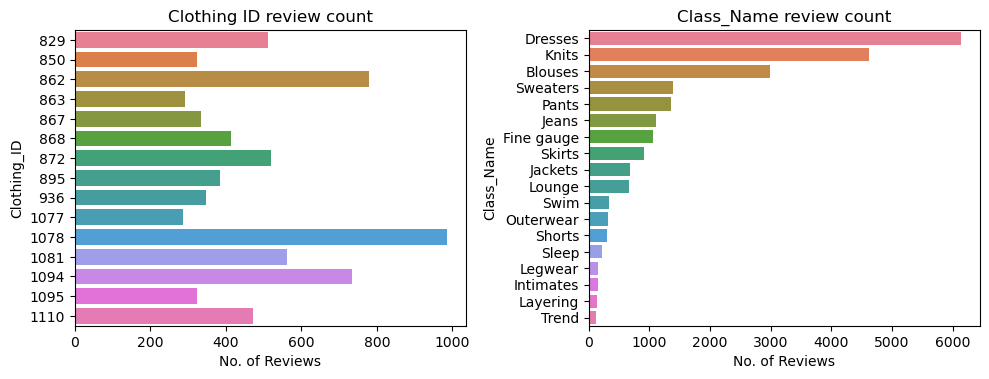

In [65]:
# Plotting Clothing_ID Distribution 
plt.figure(figsize=(10, 7))
# Adding plot title and labels for Clothing_ID
plt.subplot(2, 2, 1)
# Create line plot for each month of the year with a unique color
sns.barplot(data=df_Clothing_ID_count_top15, y="Clothing_ID", x="count", label='Clothing_ID',palette="husl",orient="h")
# Create scatter plot for each month of the year with the same unique color
#sns.scatterplot(data=df_q_year, x='Quarter', y='VALUE', color=palette[i])

plt.title('Clothing ID review count')
plt.xlabel('No. of Reviews')
plt.ylabel('Clothing_ID')
# Show the legend outside the plot

# Adjust layout for legend
plt.tight_layout()

# Adding plot title and labels for Class_Name
plt.subplot(2, 2, 2)
# Create line plot for each month of the year with a unique color
sns.barplot(data=df_class_count, y="Class_Name", x="count", label='Class_Name',palette="husl",orient="h")
plt.title('Class_Name review count')
plt.xlabel('No. of Reviews')
plt.ylabel('Class_Name')

plt.tight_layout()
plt.show()

In [67]:
# determining the name of the file
file_name = 'Age_Group_Clothing_Class.xlsx'
 
# saving the excel
df_Age_Groups_Class_sent.to_excel(file_name)

In [ ]:
#Plotting the Age + Class_Name + Clothing_ID sorted via highest count (count >50)
#df_Age_Groups_Class_count.unstack(level=2).plot(kind='bar', subplots=False, rot=0, figsize=(16, 7),stacked=True)
#plt.tight_layout()


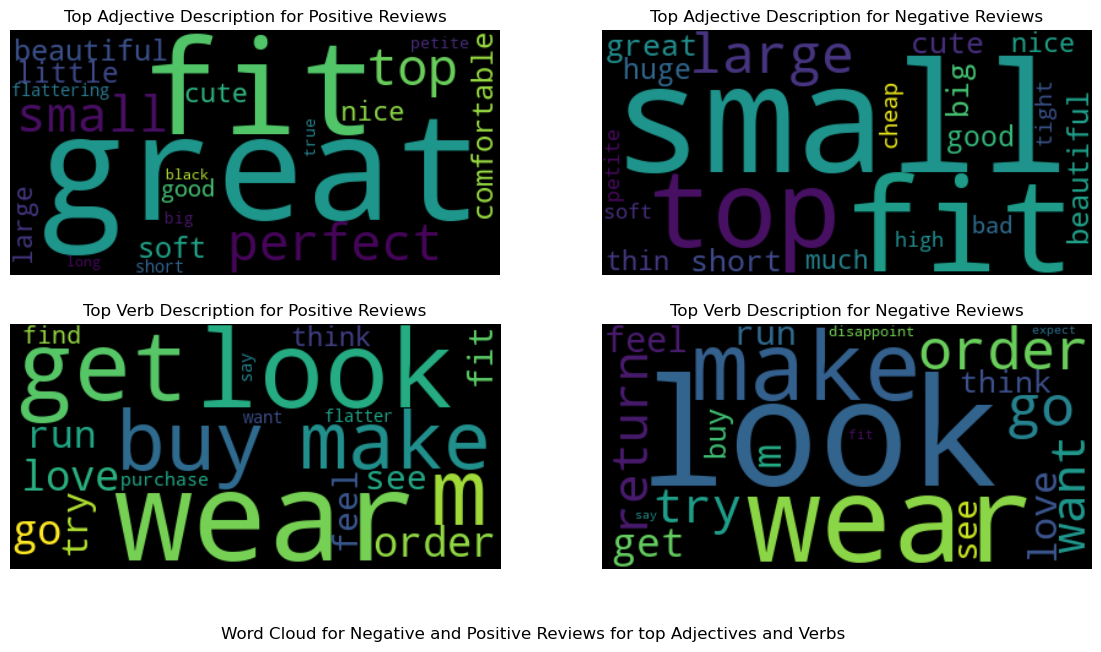

<Figure size 640x480 with 0 Axes>

In [68]:
#Creating Word Count for Positive and Negtive Reviews Based on Frequency of Words
from operator import itemgetter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

#Adjective Positive Clouds
adj_positive_counts_1 = pd.DataFrame(adj_positive_counts)
adj_positive_counts_1.columns = ['Word','Freq']
adj_positive_dict=dict(adj_positive_counts_1.values)
adj_positive_cloud = WordCloud(min_word_length =3,background_color='black').generate_from_frequencies(adj_positive_dict)

#Adjective Negative Clouds
adj_negative_counts_1 = pd.DataFrame(adj_negative_counts)
adj_negative_counts_1.columns = ['Word','Freq']
adj_negative_dict=dict(adj_negative_counts_1.values)
adj_negative_cloud = WordCloud(min_word_length =3,background_color='black').generate_from_frequencies(adj_negative_dict)

#Verb Positive Clouds
verb_positive_counts_1 = pd.DataFrame(verb_positive_counts)
verb_positive_counts_1.columns = ['Word','Freq']
verb_positive_dict=dict(verb_positive_counts_1.values)
verb_positive_cloud = WordCloud(min_word_length =3,background_color='black').generate_from_frequencies(verb_positive_dict)

#Adjective Negative Clouds
verb_negative_counts_1 = pd.DataFrame(verb_negative_counts)
verb_negative_counts_1.columns = ['Word','Freq']
verb_negative_dict=dict(verb_negative_counts_1.values)
verb_negative_cloud = WordCloud(min_word_length =3,background_color='black').generate_from_frequencies(verb_negative_dict)

#plot

plt.figure(figsize=(14, 7))
txt="Word Cloud for Negative and Positive Reviews for top Adjectives and Verbs"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.subplot(2, 2, 1)
plt.imshow(adj_positive_cloud, interpolation='bilinear')
plt.title('Top Adjective Description for Positive Reviews')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(adj_negative_cloud, interpolation='bilinear')
plt.title('Top Adjective Description for Negative Reviews')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(verb_positive_cloud, interpolation='bilinear')
plt.title('Top Verb Description for Positive Reviews')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(verb_negative_cloud, interpolation='bilinear')
plt.title('Top Verb Description for Negative Reviews')
plt.axis('off')

plt.show()
plt.savefig("Word_Cloud.jpg")

In [68]:
#We are taking reviews of Dresses.
df_sliced_dresses = pd.DataFrame(df[df['Class_Name'] == 'Dresses']).sort_values(by=('Sentiment_Polarity'),ascending = False)

#df_sliced.columns = ['Title+Review']
df_sliced_dresses.head(5)

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Title+Review,Sentiment_Labels,Sentiment_Polarity,Sentiment_Polarity_1,words_adj,words_verb,Sentiment_Check,Age_Groups
1190,1094,60,5,1,1,General,Dresses,Dresses,"lady dress ever perfect feminine dress, would",Positive,1.0,Positive,"[perfect, feminine]",[],True,"(55, 60]"
5358,1083,52,5,1,3,General Petite,Dresses,Dresses,perfect holiday dress best purchase season,Positive,1.0,Positive,"[perfect, good]",[],True,"(50, 55]"
13999,1086,46,5,1,0,General,Dresses,Dresses,cover sin flowing perfect hide flaw adore,Positive,1.0,Positive,[perfect],"[cover, flow]",True,"(45, 50]"
12276,1082,34,5,1,0,General Petite,Dresses,Dresses,make look skinnier dress awesome make look ski...,Positive,1.0,Positive,"[skinny, awesome, skinny]","[make, look, make, look]",True,"(30, 35]"
10418,1110,25,4,1,0,General,Dresses,Dresses,perfect dress work flattering flowy dress woul...,Positive,1.0,Positive,"[perfect, flowy]","[flatter, pair]",True,"(20, 25]"


In [69]:
#Creating a Topic Model
#Gensim Modeling
#df_sliced_dresses['Title+Review'] = df_sliced_dresses['Title+Review'].to_list()
texts = [s.split() for s in df_sliced_dresses['Title+Review']]
processed_text_dresses = []

for text in texts:
  #take out stop words
  text = [word for word in text if word not in stopwords] 
  #add it to our list
  processed_text_dresses.append(text)

processed_text_dresses[6]

['beautiful',
 'dress',
 'detail',
 'color',
 'exquisite',
 'stop',
 'hesitating',
 'get',
 'dress']

In [70]:
#create a dictionary of the words
dictionary_dresses = corpora.Dictionary(processed_text_dresses)

#create a TDM
doc_term_matrix_dresses = [dictionary_dresses.doc2bow(doc) for doc in processed_text_dresses]

In [71]:
#from pyLDAvis import gensim
lda_model20_dresses = gensim.models.ldamodel.LdaModel(corpus = doc_term_matrix_dresses, #TDM
                                                       id2word = dictionary_dresses, #Dictionary
                                                       num_topics = 20, 
                                                       random_state = 100,
                                                       update_every = 1,
                                                       chunksize = 100,
                                                       passes = 20,
                                                       alpha = 'auto',
                                                       per_word_topics = True)
                                           
for idx, topic in lda_model20_dresses.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.000*"size(4)" + 0.000*"odd," + 0.000*"appropriately" + 0.000*""oh" + 0.000*"granted," + 0.000*"gosh," + 0.000*"(6)" + 0.000*"shall" + 0.000*"winnrer" + 0.000*"largely"
Topic: 1 
Words: 0.285*"cute" + 0.185*"shape" + 0.126*"looking" + 0.050*"liked" + 0.049*"ended" + 0.011*"turn" + 0.007*"voluminous" + 0.000*"small" + 0.000*"little" + 0.000*"back"
Topic: 2 
Words: 0.151*"could" + 0.118*"get" + 0.080*"see" + 0.063*"comfortable" + 0.058*"time" + 0.047*"summer" + 0.047*"skirt" + 0.045*"lot" + 0.034*"buy" + 0.028*"someone"
Topic: 3 
Words: 0.105*"store" + 0.090*"bust" + 0.065*"zipper" + 0.061*"super" + 0.059*"hip" + 0.053*"saw" + 0.050*"area" + 0.049*"loved" + 0.040*"sure" + 0.038*"belt"
Topic: 4 
Words: 0.329*"really" + 0.130*"sleeve" + 0.078*"figure" + 0.068*"detail" + 0.054*"tall" + 0.039*"curvy" + 0.036*"perfectly" + 0.028*"winter" + 0.024*"(and" + 0.013*"baby"
Topic: 5 
Words: 0.231*"looked" + 0.144*"chest" + 0.113*"pattern" + 0.077*"fitted" + 0.067*"show" + 0.045*"cu

In [72]:
lda_dresses_topics = lda_model20_dresses.get_document_topics(doc_term_matrix_dresses, minimum_probability=0.0)
lda_dresses_topics_csr = gensim.matutils.corpus2csc(lda_dresses_topics)
lda_dresses_topics_numpy = lda_dresses_topics_csr.T.toarray()
lda_dresses_topics_df = pd.DataFrame(lda_dresses_topics_numpy)
lda_dresses_topics

In [73]:
#We are taking reviews of Dresses.
df_sliced_knits = pd.DataFrame(df[df['Class_Name'] == 'Knits']).sort_values(by=('Sentiment_Polarity'),ascending = False)

#df_sliced.columns = ['Title+Review']
df_sliced_knits.head(5)

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Title+Review,Sentiment_Labels,Sentiment_Polarity,Sentiment_Polarity_1,words_adj,words_verb,Sentiment_Check,Age_Groups
21825,886,43,5,1,3,General Petite,Tops,Knits,"figure flattering 5'6"" 128 lb 32b chest size x...",Positive,1.000000,Positive,[perfect],[flatter],True,"(40, 45]"
2788,863,47,2,0,10,General,Tops,Knits,wish would redo idea shirt awesome need made l...,Negative,0.900000,Positive,"[awesome, long, boxy, happy]","[wish, redo, make, make, think, buy]",False,"(45, 50]"
5956,880,46,4,1,0,General,Tops,Knits,day night looking great day night shirt perfec...,Positive,0.866667,Positive,"[great, perfect, happy]",[look],True,"(45, 50]"
19204,862,36,5,1,0,General,Tops,Knits,perfect top everything top perfect quality gre...,Positive,0.828571,Positive,"[perfect, top, top, perfect, great, awesome, p...",[],True,"(35, 40]"
6986,877,35,5,1,2,General,Tops,Knits,living probably one best retailer purchase eve...,Positive,0.825000,Positive,"[good, comfy, warm, good, thickness, medium, p...","[live, make]",True,"(30, 35]"


In [74]:
#Gensim Modeling
##create a spot to save the processed text. 
#df_sliced_knits['Title+Review'] = df_sliced_knits['Title+Review'].to_list()
texts = [s.split() for s in df_sliced_knits['Title+Review']]
processed_text_knits = []

for text in texts:
  #take out stop words
  text = [word for word in text if word not in stopwords] 
  #add it to our list
  processed_text_knits.append(text)

processed_text_knits[0]

['figure',
 'flattering',
 '5\'6"',
 '128',
 'lb',
 '32b',
 'chest',
 'size',
 'x',
 'perfect']

In [75]:
dictionary_knits = corpora.Dictionary(processed_text_knits)

#create a TDM
doc_term_matrix_knits = [dictionary_knits.doc2bow(doc) for doc in processed_text_knits]

In [76]:
lda_model20_knits = gensim.models.ldamodel.LdaModel(corpus = doc_term_matrix_knits, #TDM
                                           id2word = dictionary_knits, #Dictionary
                                           num_topics = 20, 
                                           random_state = 100,
                                           update_every = 1,
                                           chunksize = 100,
                                           passes = 20,
                                           alpha = 'auto',
                                           per_word_topics = True)
                                           
for idx, topic in lda_model20_knits.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.099*"person" + 0.080*"received" + 0.080*"fitted" + 0.077*"wore" + 0.074*"saw" + 0.074*"hang" + 0.068*"sizing" + 0.045*"item" + 0.036*"many" + 0.034*"compliment"
Topic: 1 
Words: 0.425*"bought" + 0.199*"store" + 0.058*"say" + 0.037*"absolutely" + 0.000*"small" + 0.000*"little" + 0.000*"back" + 0.000*"thin" + 0.000*"white" + 0.000*"black"
Topic: 2 
Words: 0.287*"sleeve" + 0.075*"unique" + 0.066*"lovely" + 0.059*"add" + 0.058*"print" + 0.057*"liked" + 0.042*"kept" + 0.033*"wardrobe" + 0.028*"addition" + 0.022*"touch"
Topic: 3 
Words: 0.236*"soft" + 0.201*"pretty" + 0.062*"day" + 0.044*"peplum" + 0.042*"pattern" + 0.040*"feminine" + 0.027*"design," + 0.022*"swing" + 0.020*"orange" + 0.018*"texture"
Topic: 4 
Words: 0.131*"shirt" + 0.118*"like" + 0.088*"look" + 0.060*"really" + 0.056*"material" + 0.044*"quality" + 0.038*"much" + 0.036*"even" + 0.033*"nice" + 0.033*"could"
Topic: 5 
Words: 0.196*"see" + 0.176*"front" + 0.113*"definitely" + 0.050*"worth" + 0.049*"tunic" + 0

In [77]:
lda_knits_topics = lda_model20_knits.get_document_topics(doc_term_matrix_knits, minimum_probability=0.0)
lda_knits_topics_csr = gensim.matutils.corpus2csc(lda_knits_topics)
lda_knits_topics_numpy = lda_knits_topics_csr.T.toarray()
lda_knits_topics_df = pd.DataFrame(lda_knits_topics_numpy)
lda_knits_topics

In [78]:
import pyLDAvis
vis = pyLDAvis.gensim_models.prepare(lda_model20_dresses, doc_term_matrix_dresses, dictionary_dresses, n_jobs = 1)

In [79]:
pyLDAvis.save_html(vis, 'LDA_Visualization_Dresses.html')

In [80]:
vis = pyLDAvis.gensim_models.prepare(lda_model20_knits, doc_term_matrix_knits, dictionary_knits, n_jobs = 1)

In [81]:
pyLDAvis.save_html(vis, 'LDA_Visualization_Knits.html')